<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-13 16:22:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  45.2MB/s    in 4.4s    

2025-07-13 16:23:02 (45.4 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


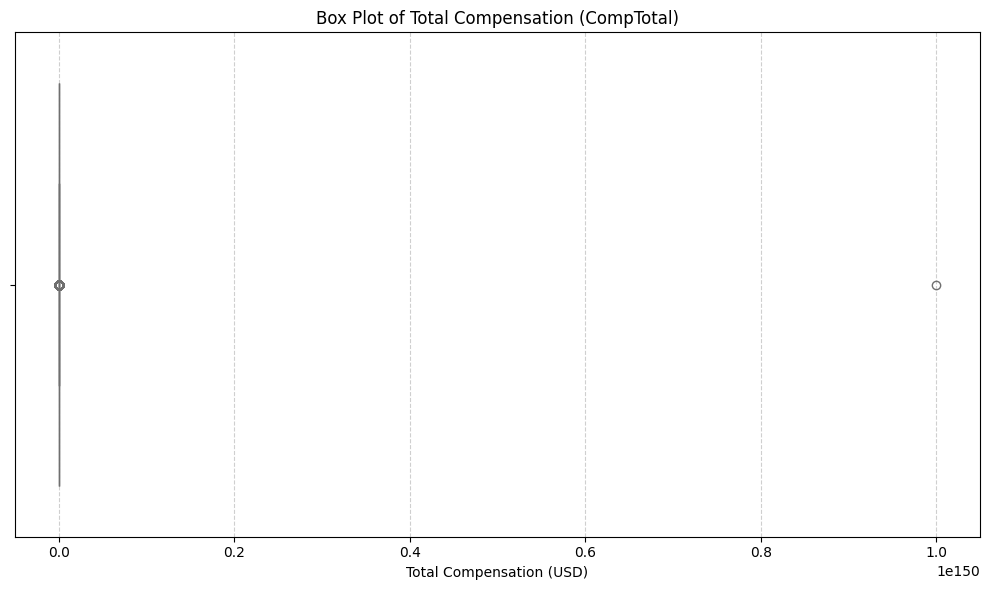

In [9]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query for CompTotal
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert CompTotal to numeric and drop invalids
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df.dropna(subset=['CompTotal'], inplace=True)

# Step 4: Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CompTotal'], color='skyblue')
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


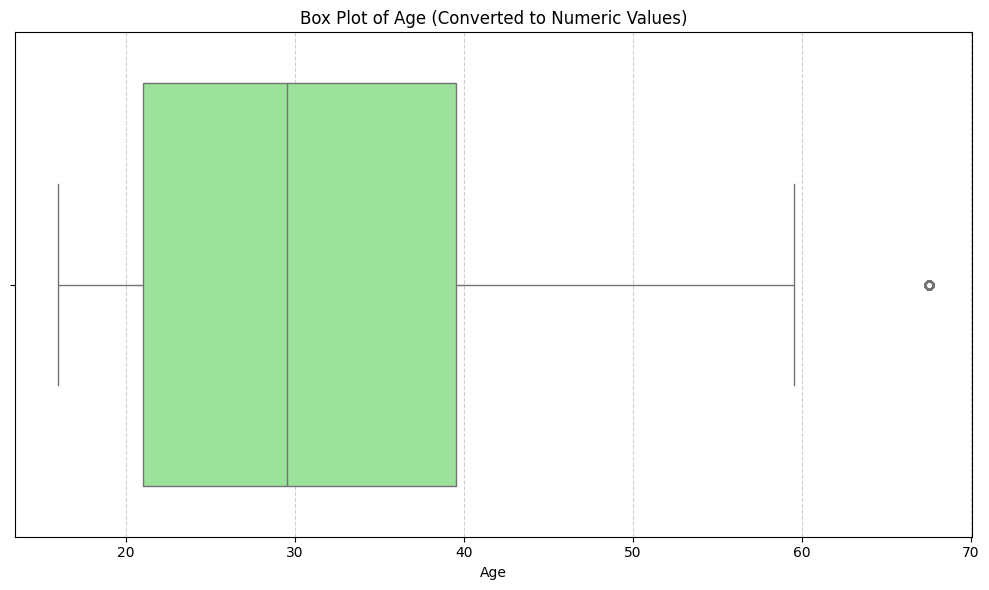

In [10]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Read Age data
query = """
SELECT Age FROM main
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Map Age ranges to approximate numeric values
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "30-35 years old": 32.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 67.5,
    "Prefer not to say": None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with NaN age values
df.dropna(subset=['AgeNumeric'], inplace=True)

# Step 4: Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AgeNumeric'], color='lightgreen')
plt.title("Box Plot of Age (Converted to Numeric Values)")
plt.xlabel("Age")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


### Task 3: Visualizing the Composition of Data


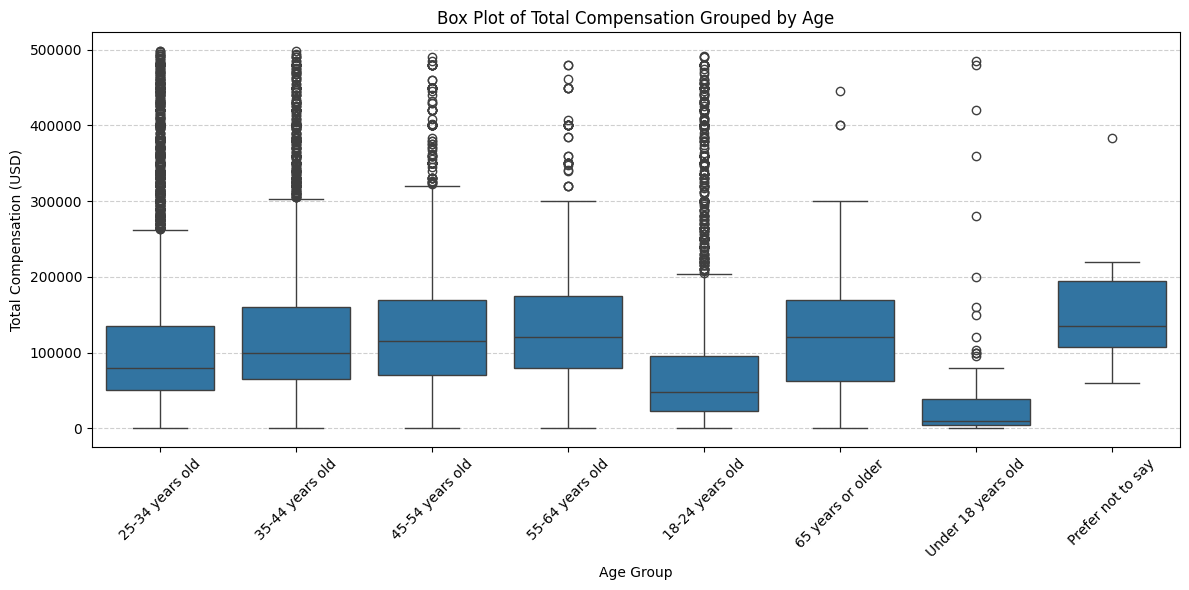

In [11]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query relevant data
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df.dropna(subset=['CompTotal'], inplace=True)

# Step 4: Filter out extreme outliers (optional but improves plot readability)
df = df[df['CompTotal'] < 500000]  # Filtering for visual clarity

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='CompTotal')
plt.title("Box Plot of Total Compensation Grouped by Age")
plt.xlabel("Age Group")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


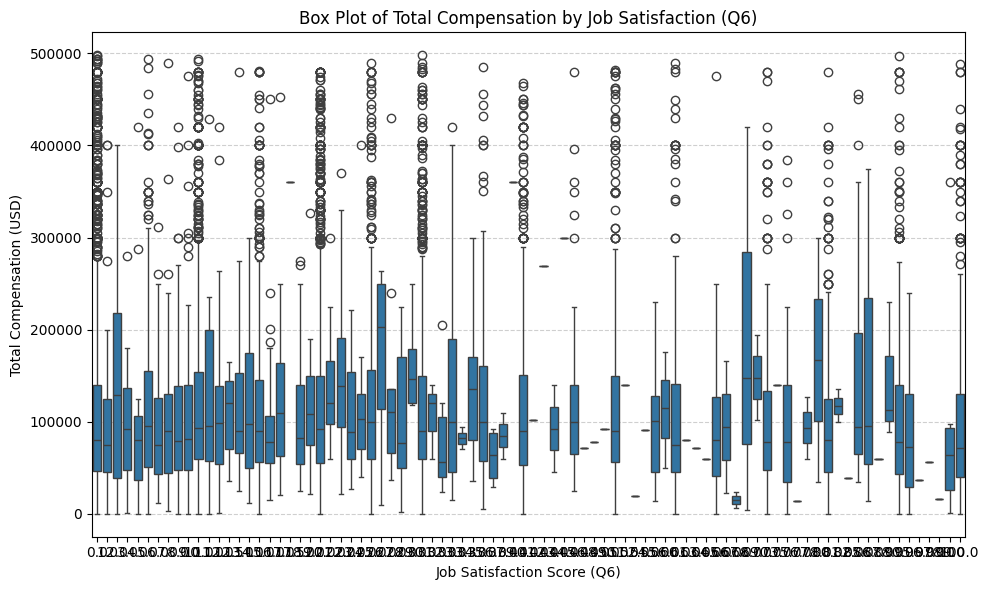

In [12]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query required columns
query = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert to numeric (if needed)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df.dropna(subset=['CompTotal', 'JobSatPoints_6'], inplace=True)

# Optional: Filter out extreme compensation values for better plot readability
df = df[df['CompTotal'] < 500000]

# Step 4: Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobSatPoints_6', y='CompTotal')
plt.title("Box Plot of Total Compensation by Job Satisfaction (Q6)")
plt.xlabel("Job Satisfaction Score (Q6)")
plt.ylabel("Total Compensation (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


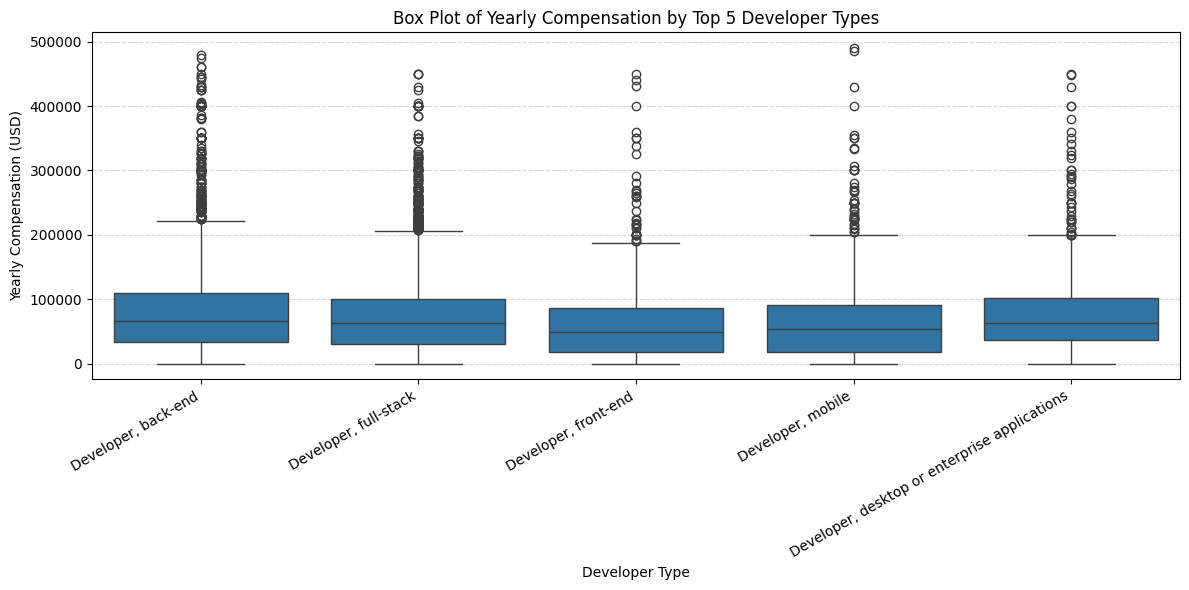

In [13]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query relevant columns
query = """
SELECT DevType, ConvertedCompYearly 
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Expand multi-valued DevType into individual rows
df['DevType'] = df['DevType'].str.split(';')
df_exploded = df.explode('DevType')
df_exploded['DevType'] = df_exploded['DevType'].str.strip()

# Step 4: Identify the top 5 most common developer types
top5_devtypes = df_exploded['DevType'].value_counts().nlargest(5).index.tolist()

# Step 5: Filter for only top 5 dev types
df_top5 = df_exploded[df_exploded['DevType'].isin(top5_devtypes)]

# Step 6: Remove extreme outliers (optional)
df_top5 = df_top5[df_top5['ConvertedCompYearly'] < 500000]

# Step 7: Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x='DevType', y='ConvertedCompYearly')
plt.title("Box Plot of Yearly Compensation by Top 5 Developer Types")
plt.xlabel("Developer Type")
plt.ylabel("Yearly Compensation (USD)")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


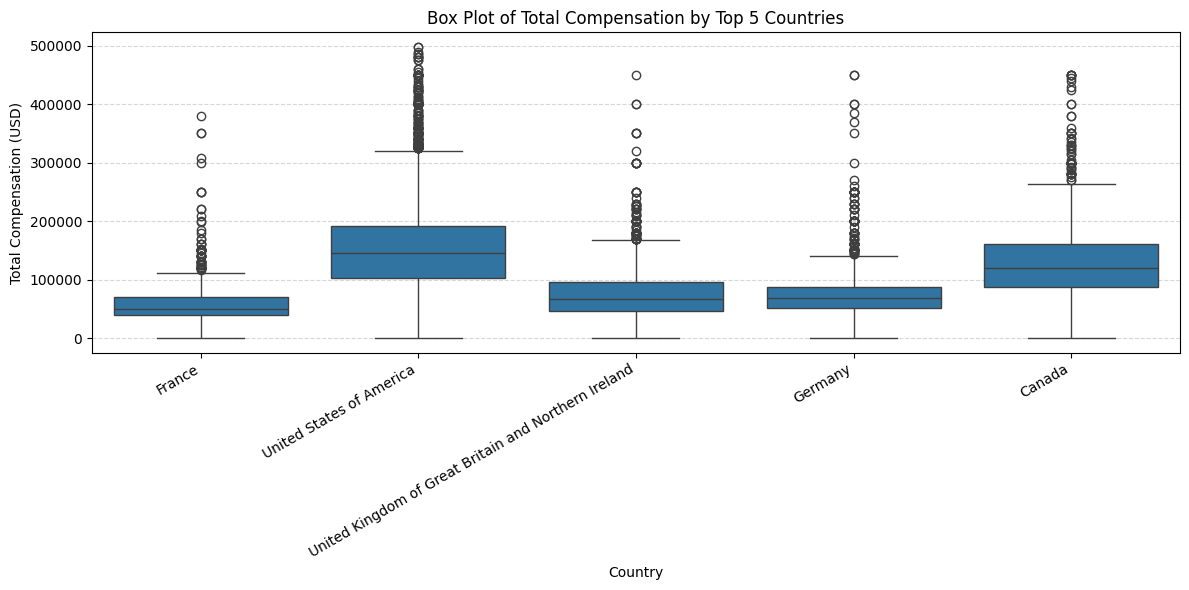

In [14]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Read Country and CompTotal columns
query = """
SELECT Country, CompTotal 
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert CompTotal to numeric and drop missing/invalid values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Step 4: Filter to remove extreme outliers (e.g., over $500,000)
df = df[df['CompTotal'] < 500000]

# Step 5: Get top 5 countries by response count
top5_countries = df['Country'].value_counts().nlargest(5).index.tolist()
df_top5 = df[df['Country'].isin(top5_countries)]

# Step 6: Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x='Country', y='CompTotal')
plt.title("Box Plot of Total Compensation by Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_1952/2047886977.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


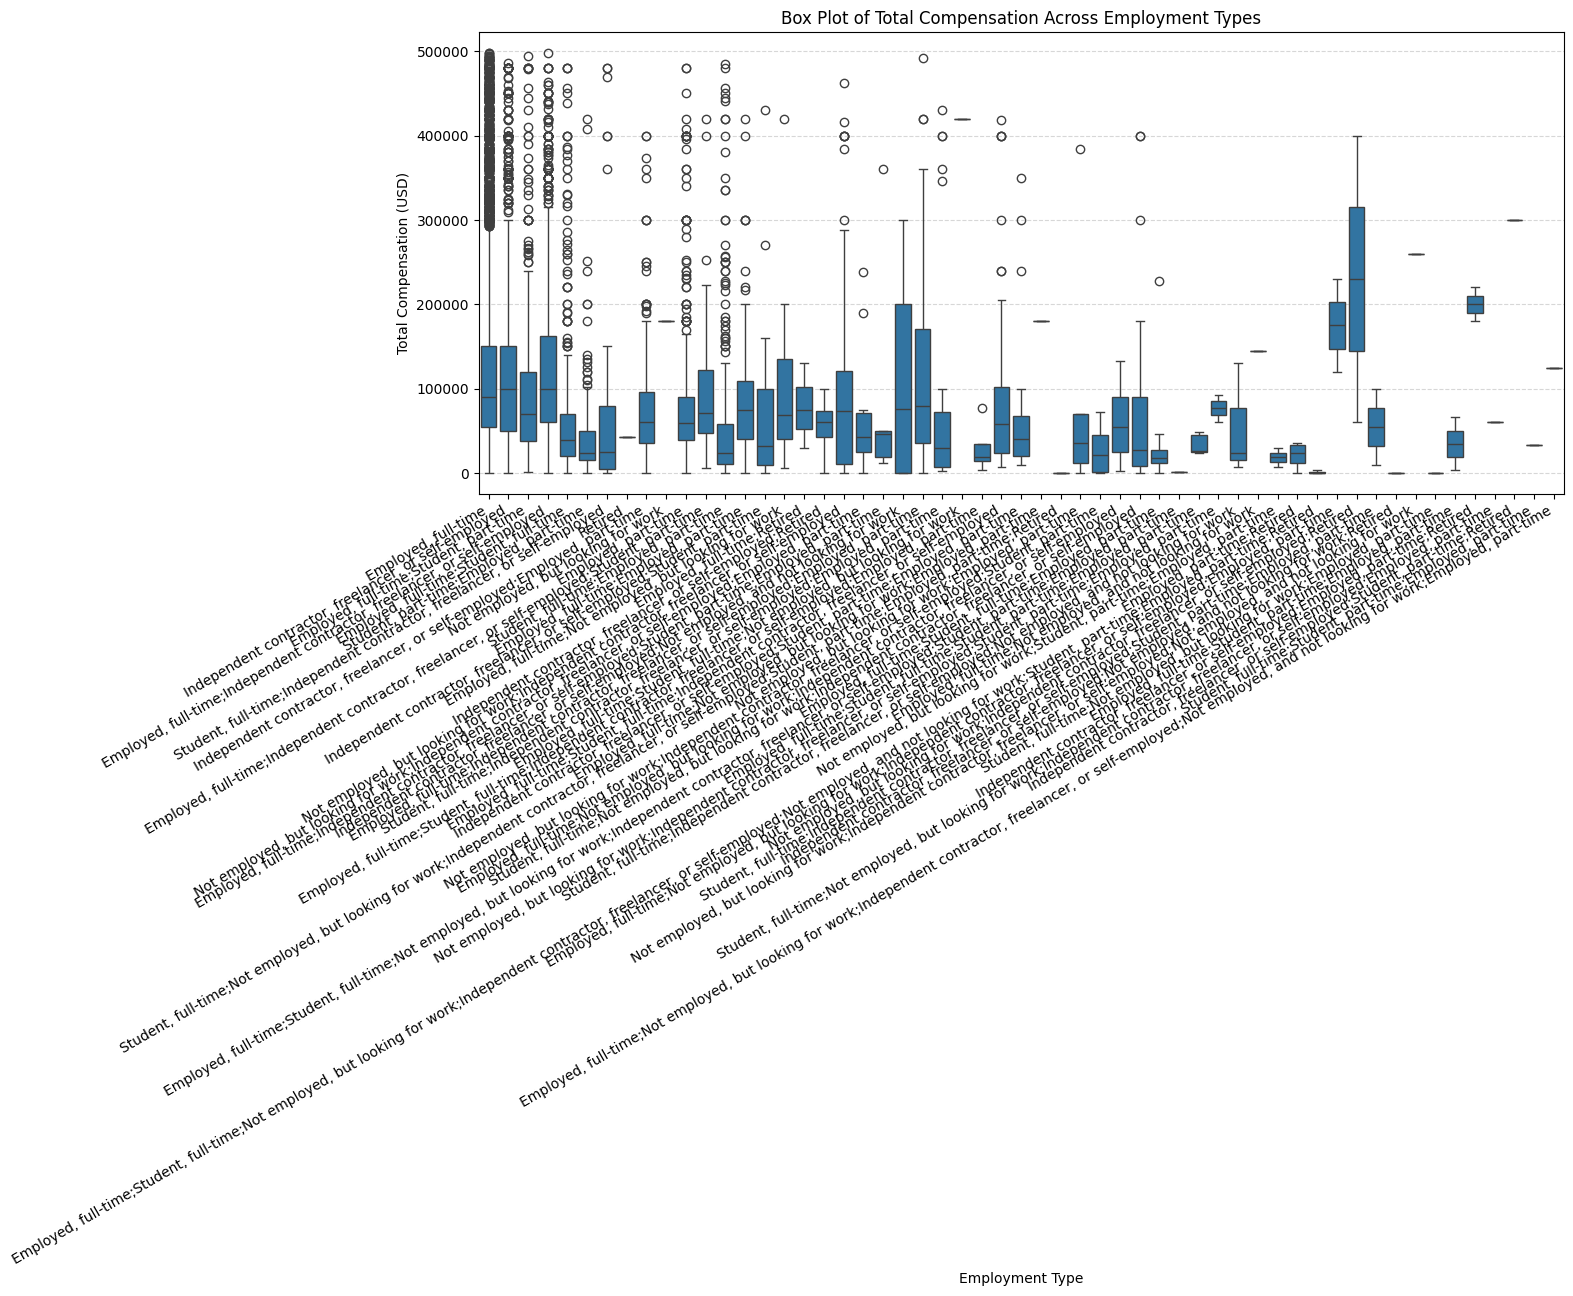

In [15]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query relevant data
query = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Step 4: Remove extreme outliers for clarity (e.g., above $500,000)
df = df[df['CompTotal'] < 500000]

# Step 5: Plot the box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Employment', y='CompTotal')
plt.title("Box Plot of Total Compensation Across Employment Types")
plt.xlabel("Employment Type")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


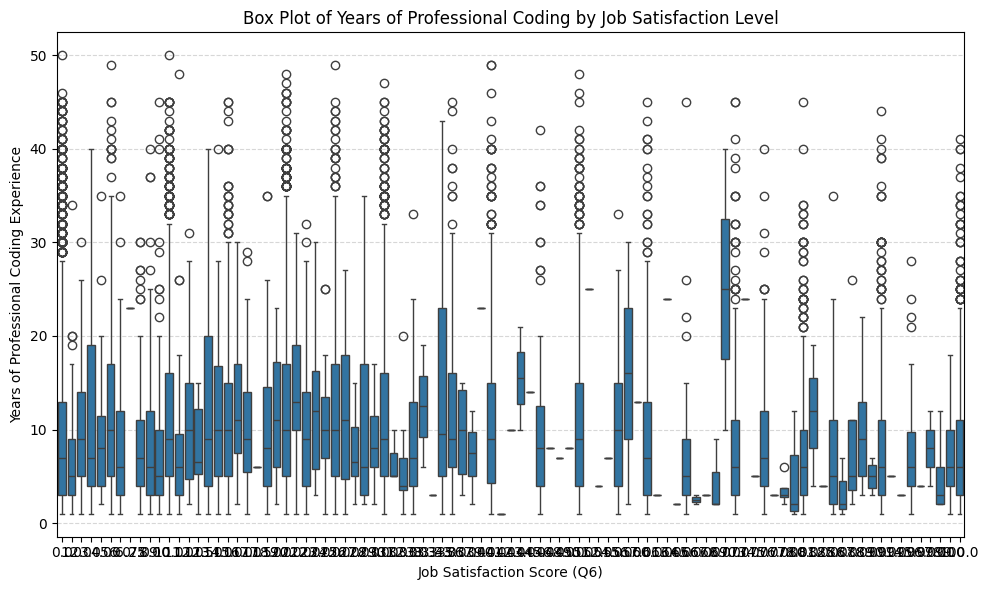

In [16]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query necessary columns
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert columns to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna()

# Step 4: Remove outliers in experience (e.g., YearsCodePro > 50)
df = df[df['YearsCodePro'] <= 50]

# Step 5: Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobSatPoints_6', y='YearsCodePro')
plt.title("Box Plot of Years of Professional Coding by Job Satisfaction Level")
plt.xlabel("Job Satisfaction Score (Q6)")
plt.ylabel("Years of Professional Coding Experience")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [17]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
